## Objective
- Predict if a customer is happy or not based on the answers they give to questions asked.

## Data
- Y: target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
- X1: my order was delivered on time with values indicating 1 (bad) to 5 (Excellent)
- X2: contents of my order was as I expected with values indicating 1 (bad) to 5 (Excellent)
- X3: I ordered everything I wanted to order with values indicating 1 (bad) to 5 (Excellent)
- X4: I paid a good price for my order with values indicating 1 (bad) to 5 (Excellent)
- X5: I am satisfied with my courier with values indicating 1 (bad) to 5 (Excellent)
- X6: the app makes ordering easy for me with values indicating 1 (bad) to 5 (Excellent)

In [1]:
!pip install shap

## Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.preprocessing import FunctionTransformer
# To build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
# To use statistical functions
import scipy.stats as stats

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import lime
import lime.lime_tabular

from sklearn.model_selection import KFold

import shap
shap.initjs()


from sklearn.feature_selection import chi2



### Read Dataset

In [3]:
ACME_data = pd.read_csv("ACME-HappinessSurvey2020.csv")
df = ACME_data.copy()

### View Dataset

In [4]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
df.tail()

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


### Understanding Shape

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 126 rows and 7 columns.


### Checking data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


### Fixing data type

In [8]:
categorical_var = ['Y','X1','X2','X3','X4','X5','X6']
for colname in categorical_var:
    df[colname] = df[colname].astype('category')

#checking if properly changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Y       126 non-null    category
 1   X1      126 non-null    category
 2   X2      126 non-null    category
 3   X3      126 non-null    category
 4   X4      126 non-null    category
 5   X5      126 non-null    category
 6   X6      126 non-null    category
dtypes: category(7)
memory usage: 2.3 KB


### Missing Value Check

In [9]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

### Categorical Data Value check

In [10]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

1    69
0    57
Name: Y, dtype: int64



5    65
4    40
3    20
1     1
Name: X1, dtype: int64



3    42
2    34
1    27
4    17
5     6
Name: X2, dtype: int64



3    55
4    33
5    17
2    14
1     7
Name: X3, dtype: int64



4    53
3    41
5    25
2     5
1     2
Name: X4, dtype: int64



4    50
5    31
3    22
2    16
1     7
Name: X5, dtype: int64



5    57
4    47
3    20
1     1
2     1
Name: X6, dtype: int64





### Dataset Summary

In [11]:
df.describe(include=["category"])

,Y,X1,X2,X3,X4,X5,X6
count,126,126,126,126,126,126,126
unique,2,4,5,5,5,5,5
top,1,5,3,3,4,4,5
freq,69,65,42,55,53,50,57


## EDA

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

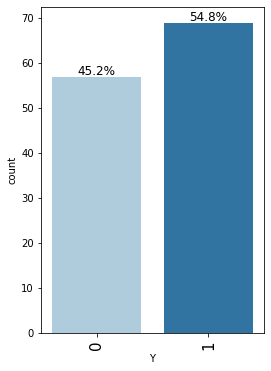

In [13]:
labeled_barplot(df, "Y", perc=True)

- Most customers (54.8%) are happy 

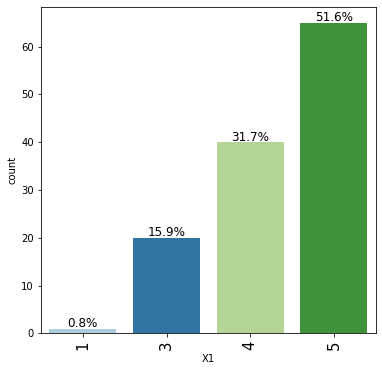

In [14]:
labeled_barplot(df, "X1", perc=True)

- Most customers had their orders delivered on time/are happy with the delivery time of their order

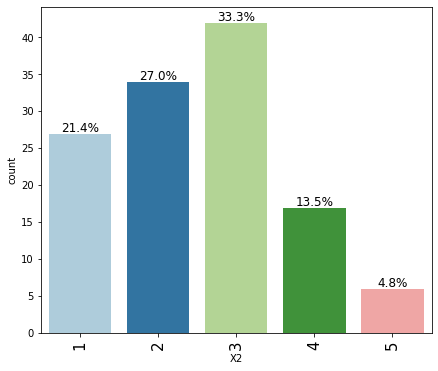

In [15]:
labeled_barplot(df, "X2", perc=True)

- Customers tend to be unhappy with the contents of their orders with 48.4% rating either a 1 or 2

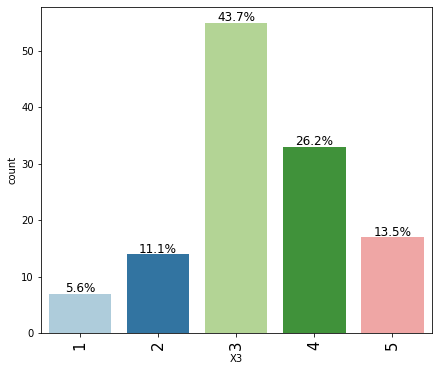

In [16]:
labeled_barplot(df, "X3", perc=True)

- Most customers ordered what they wanted with 39.7% rating a 4 or 5

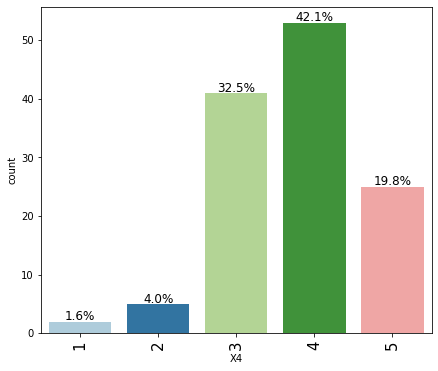

In [17]:
labeled_barplot(df, "X4", perc=True)

- Most customers are happy with the price of what they ordered

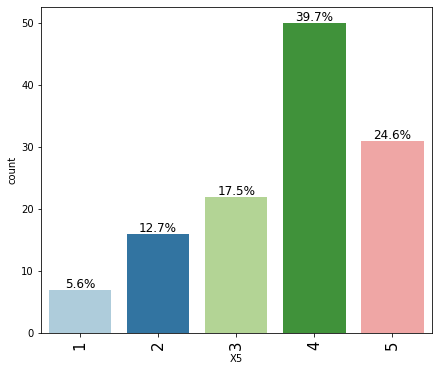

In [18]:
labeled_barplot(df, "X5", perc=True)

- Most customers are happy with their courier

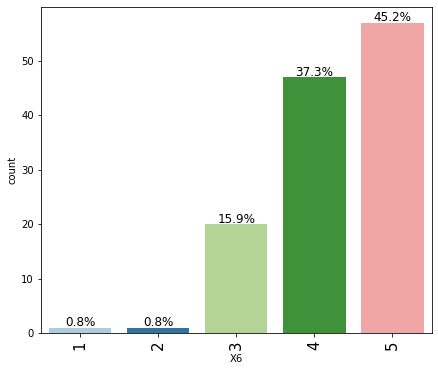

In [19]:
labeled_barplot(df, "X6", perc=True)

- Most customers are happy with how easy the app is to use

## Bivariate Analysis

In [20]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Y     0   1  All
X1              
All  57  69  126
4    24  16   40
5    20  45   65
3    12   8   20
1     1   0    1
------------------------------------------------------------------------------------------------------------------------


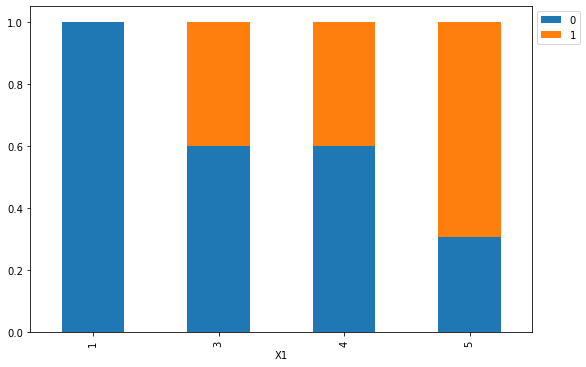

In [21]:
stacked_barplot(df,"X1","Y")

- As rating for delivery on time increases, trend of number of customers happy increases

Y     0   1  All
X2              
All  57  69  126
3    19  23   42
1    13  14   27
2    13  21   34
4    10   7   17
5     2   4    6
------------------------------------------------------------------------------------------------------------------------


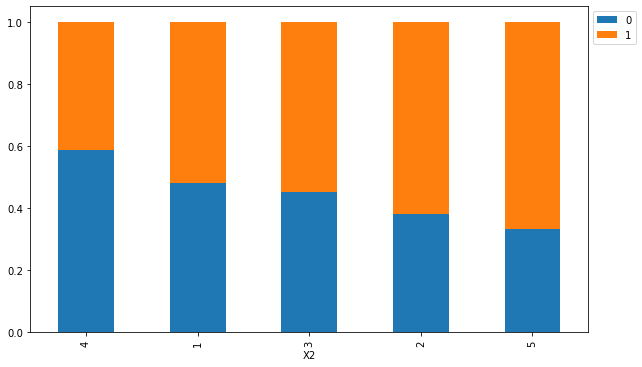

In [22]:
stacked_barplot(df,"X2","Y")

- Hard to see a trend here with rating for contends of order being what was expected.
- Customer satisfaction increases from rating 1 to 2, then decreases from rating 2 to 4 and then increases again at rating 5. Might cause skewing of predictions.

Y     0   1  All
X3              
All  57  69  126
3    29  26   55
4    11  22   33
2     7   7   14
5     6  11   17
1     4   3    7
------------------------------------------------------------------------------------------------------------------------


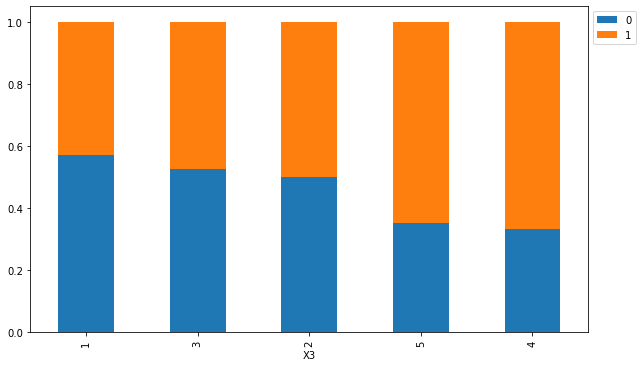

In [23]:
stacked_barplot(df,"X3","Y")

- In regards to customers ordering everything they want to order, number of customers happy tends to increase as  rating increases, with only a slight decrease from ratings 2 to 3 before the trend continues. 

Y     0   1  All
X4              
All  57  69  126
4    23  30   53
3    20  21   41
5    10  15   25
2     4   1    5
1     0   2    2
------------------------------------------------------------------------------------------------------------------------


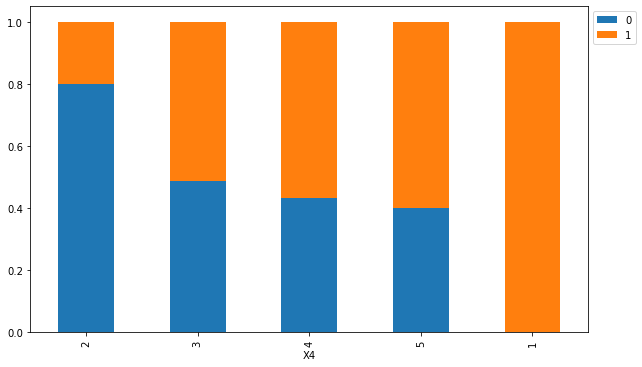

In [24]:
stacked_barplot(df,"X4","Y")

- As customer rating increases, number of customers happy increases regarding paying a good price for order.  The 1 rating is an outlier as there is too little data in that group to make an accurate prediction

Y     0   1  All
X5              
All  57  69  126
4    22  28   50
3    12  10   22
2     9   7   16
5     9  22   31
1     5   2    7
------------------------------------------------------------------------------------------------------------------------


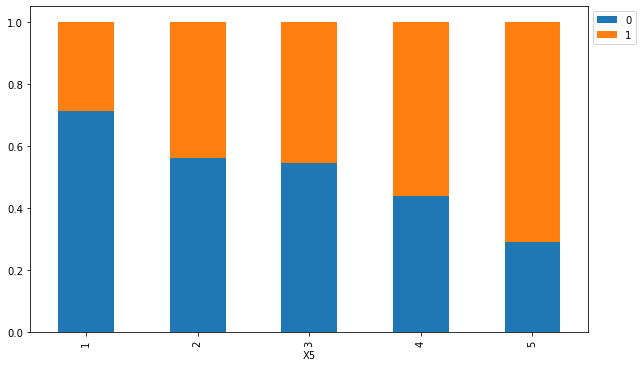

In [25]:
stacked_barplot(df,"X5","Y")

- As customer rating increases regarding satisfaction of courier, number of customers happy tends to increase

Y     0   1  All
X6              
All  57  69  126
5    22  35   57
4    20  27   47
3    14   6   20
2     1   0    1
1     0   1    1
------------------------------------------------------------------------------------------------------------------------


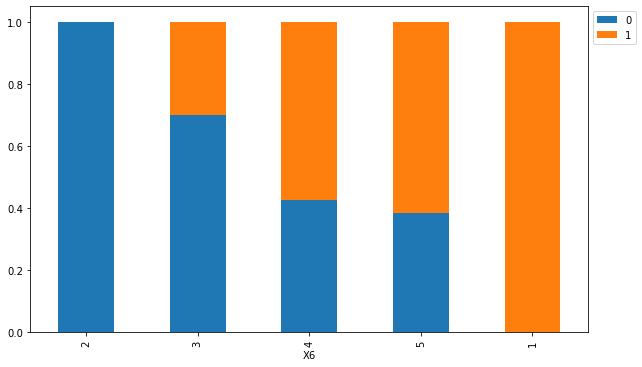

In [26]:
stacked_barplot(df,"X6","Y")

- ratings 1 and 2 have very little data, skewing the predictions, otherwise as customer rating increases for ease of app use to order the number of customers happy tends to increase

### Summary of EDA
#### Data Description:
- All datatypes are category
- Dependent variable is Y which is a category

#### Data Cleaning:
- No Missing Values

### Observations from EDA
- Across most data groups, as rating increases so does customer satisfaction
- There is very little data in the dataset which skews what ratings accurately tend to increase customer satisfaction, there is a high chance this will skew models ability to predict

### Feature engineering

<AxesSubplot:>

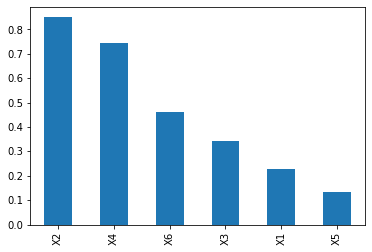

In [162]:
X = df.drop("Y", axis=1)
y = df["Y"]

chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [163]:
X = X.drop("X2",axis=1)
X = X.drop("X4",axis=1)
X = pd.get_dummies(X)

## Data preparation for modeling

In [29]:
#X = df.drop("Y", axis=1)
#X = pd.get_dummies(X)
#y = df["Y"]

In [30]:
"""
## Potential new dataset where we drop outliers?
df_outliers1 = df.drop(df.index[df['X4'] == 1])
df_outliers2 = df_outliers1.drop(df_outliers1.index[df_outliers1['X6'] == 1])
df_outliers3 = df_outliers2.drop(df_outliers2.index[df_outliers2['X1'] == 1])
X = df_outliers3.drop("Y", axis=1)
X = pd.get_dummies(X)
y = df_outliers3["Y"]
"""

'\n## Potential new dataset where we drop outliers?\ndf_outliers1 = df.drop(df.index[df[\'X4\'] == 1])\ndf_outliers2 = df_outliers1.drop(df_outliers1.index[df_outliers1[\'X6\'] == 1])\ndf_outliers3 = df_outliers2.drop(df_outliers2.index[df_outliers2[\'X1\'] == 1])\nX = df_outliers3.drop("Y", axis=1)\nX = pd.get_dummies(X)\ny = df_outliers3["Y"]\n'

In [31]:
#df_outliers = df.drop(df.index[df['X4'] == 1])
#df_outliers = df_outliers.drop(df_outliers.index[df_outliers['X1'] == 1])
#df_outliers = df_outliers.drop(df_outliers.index[df_outliers['X6'] == 2])
#X = df_outliers.drop("Y", axis=1)
#X = pd.get_dummies(X)
#y = df_outliers["Y"]

In [32]:
#df_outliers.head()

In [33]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(75, 19) (25, 19) (26, 19)


### use k-fold cross validation for this

## Model Building

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [35]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

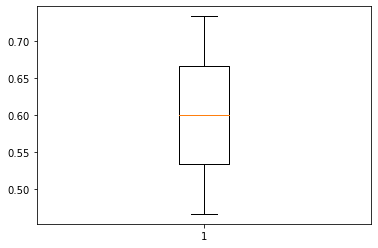

In [37]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on training set varies beteween 0.46-0.80 Accuracy

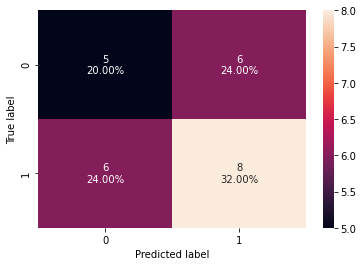

In [38]:
confusion_matrix_sklearn(lr, X_val,y_val)

In [39]:
lr_train_score=model_performance_classification_sklearn(lr, X_train, y_train)
print("Training performance \n",lr_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.666667  0.853659   0.648148  0.736842


In [40]:
lr_val_score=model_performance_classification_sklearn(lr, X_val,y_val)
print("Validation performance \n",lr_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.52  0.571429   0.571429  0.571429


### Decision Tree

In [41]:
dtree = DecisionTreeClassifier(criterion='gini',)
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

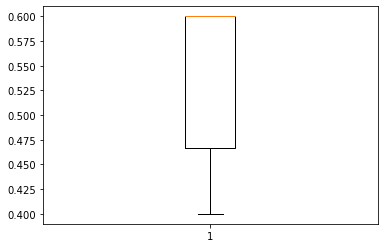

In [42]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=dtree, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

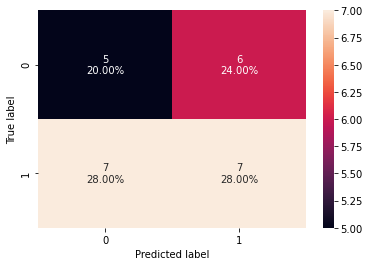

In [43]:
confusion_matrix_sklearn(dtree, X_val,y_val)

In [44]:
dtree_train_score=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_train_score)

Training performance 
    Accuracy    Recall  Precision     F1
0  0.866667  0.853659   0.897436  0.875


In [45]:
dtree_val_score=model_performance_classification_sklearn(dtree, X_val,y_val)
print("Validation performance \n",dtree_val_score)

Validation performance 
    Accuracy  Recall  Precision        F1
0      0.48     0.5   0.538462  0.518519


### Bagging

In [46]:
bagging = BaggingClassifier()
bagging.fit(X_train,y_train)

BaggingClassifier()

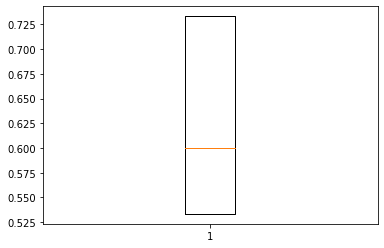

In [47]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=bagging, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [48]:
bagging_train_score=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0      0.84  0.853659   0.853659  0.853659


In [49]:
bagging_val_score=model_performance_classification_sklearn(bagging, X_val,y_val)
print("Validation performance \n",bagging_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0       0.6  0.571429   0.666667  0.615385


### ADABoost

In [50]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

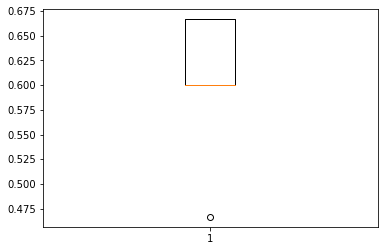

In [51]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=abc, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

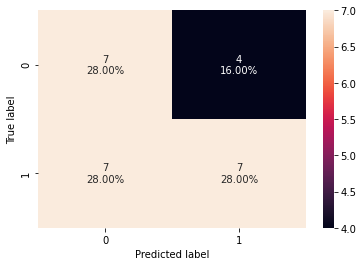

In [52]:
confusion_matrix_sklearn(abc, X_val,y_val)

In [53]:
abc_train_score= model_performance_classification_sklearn(abc, X_train,y_train)
print("Training performance \n",abc_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.706667  0.829268   0.693878  0.755556


In [54]:
abc_val_score= model_performance_classification_sklearn(abc, X_val,y_val)
print("Validation performance \n",abc_val_score)

Validation performance 
    Accuracy  Recall  Precision    F1
0      0.56     0.5   0.636364  0.56


### Gradient Boost

In [55]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

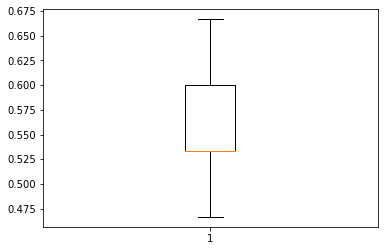

In [56]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=gbc, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

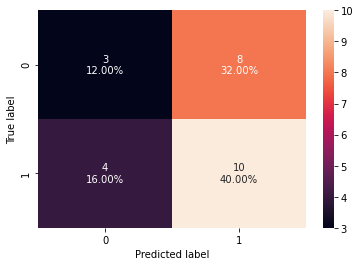

In [57]:
confusion_matrix_sklearn(gbc, X_val,y_val)

In [58]:
gbc_train_score= model_performance_classification_sklearn(gbc, X_train,y_train)
print("Training performance \n",gbc_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.866667  0.902439   0.860465  0.880952


In [59]:
gbc_val_score= model_performance_classification_sklearn(gbc, X_val,y_val)
print("Validation performance \n",gbc_val_score)

Validation performance 
    Accuracy    Recall  Precision     F1
0      0.52  0.714286   0.555556  0.625


### XGBoost

In [60]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

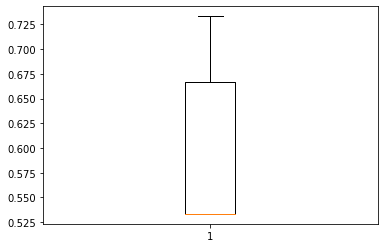

In [61]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=xgb, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

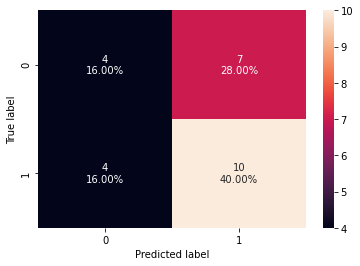

In [62]:
confusion_matrix_sklearn(xgb, X_val,y_val)

In [63]:
xgb_train_score= model_performance_classification_sklearn(xgb, X_train,y_train)
print("Training performance \n",xgb_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.866667  0.902439   0.860465  0.880952


In [64]:
xgb_val_score= model_performance_classification_sklearn(xgb, X_val,y_val)
print("Validation performance \n",xgb_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.56  0.714286   0.588235  0.645161


## Oversampling with smote

In [65]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5,
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 41
Before UpSampling, counts of label 'No': 34 

After UpSampling, counts of label 'Yes': 41
After UpSampling, counts of label 'No': 41 

After UpSampling, the shape of train_X: (82, 19)
After UpSampling, the shape of train_y: (82,) 



### Logistic regression over sampling

In [66]:
log_reg_over = LogisticRegression()

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression()

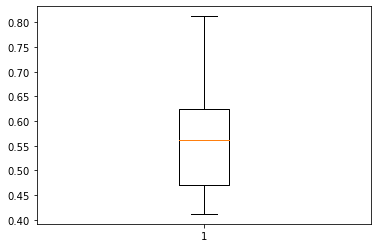

In [67]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

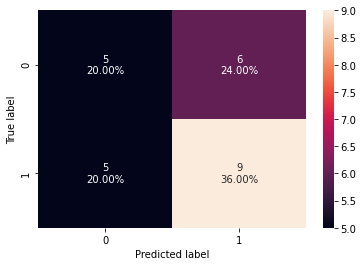

In [68]:
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

In [69]:
lr_over_train_score = model_performance_classification_sklearn(log_reg_over, X_train_over, y_train_over)
print("Training performance \n",lr_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.670732  0.829268    0.62963  0.715789


In [70]:
lr_over_val_score = model_performance_classification_sklearn(log_reg_over, X_val, y_val)
print("Validation performance \n",lr_over_val_score)

Validation performance 
    Accuracy    Recall  Precision       F1
0      0.56  0.642857        0.6  0.62069


### Decision Tree Oversampling

In [71]:
dtree_over = DecisionTreeClassifier(criterion='gini',)
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

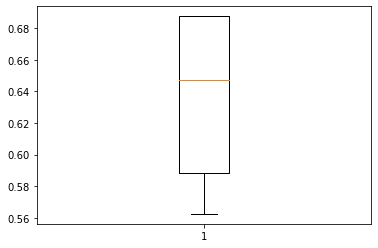

In [72]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=dtree_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

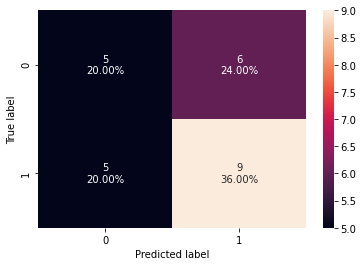

In [73]:
confusion_matrix_sklearn(dtree_over, X_val, y_val)

In [74]:
dtree_over_train_score = model_performance_classification_sklearn(dtree_over, X_train_over, y_train_over)
print("Training performance \n",dtree_over_train_score)

Training performance 
    Accuracy    Recall  Precision     F1
0  0.878049  0.853659   0.897436  0.875


In [75]:
dtree_over_val_score = model_performance_classification_sklearn(dtree_over, X_val, y_val)
print("Validation performance \n",dtree_over_val_score)

Validation performance 
    Accuracy    Recall  Precision       F1
0      0.56  0.642857        0.6  0.62069


###  Bagging Oversampling

In [76]:
bagging_over = BaggingClassifier()
bagging_over.fit(X_train_over,y_train_over)

BaggingClassifier()

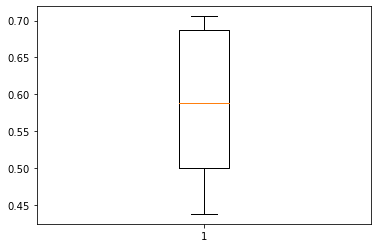

In [77]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=bagging_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

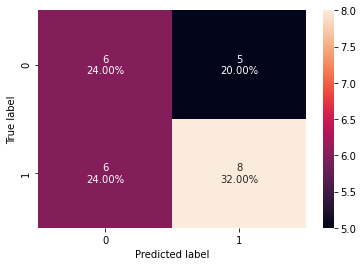

In [78]:
confusion_matrix_sklearn(bagging_over, X_val, y_val)

In [79]:
bagging_over_train_score = model_performance_classification_sklearn(bagging_over, X_train_over, y_train_over)
print("Training performance \n",bagging_over_train_score)

Training performance 
    Accuracy    Recall  Precision     F1
0  0.878049  0.853659   0.897436  0.875


In [80]:
bagging_over_val_score = model_performance_classification_sklearn(bagging_over, X_val, y_val)
print("Validation performance \n",bagging_over_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.56  0.571429   0.615385  0.592593


### Adaboost Oversample

In [81]:
abc_over = AdaBoostClassifier()
abc_over.fit(X_train_over,y_train_over)

AdaBoostClassifier()

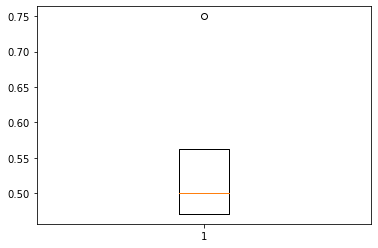

In [82]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=abc_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

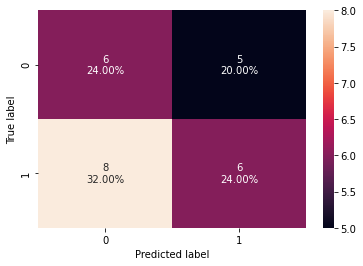

In [83]:
confusion_matrix_sklearn(abc_over, X_val, y_val)

In [84]:
abc_over_train_score = model_performance_classification_sklearn(abc_over, X_train_over, y_train_over)
print("Training performance \n",abc_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.768293  0.853659   0.729167  0.786517


In [85]:
abc_over_val_score = model_performance_classification_sklearn(abc_over, X_val, y_val)
print("Validation performance \n",abc_over_val_score)

Validation performance 
    Accuracy    Recall  Precision    F1
0      0.48  0.428571   0.545455  0.48


### GradientBoost Oversampling

In [86]:
gbc_over = GradientBoostingClassifier()
gbc_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier()

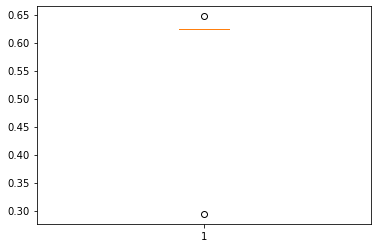

In [87]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=gbc_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

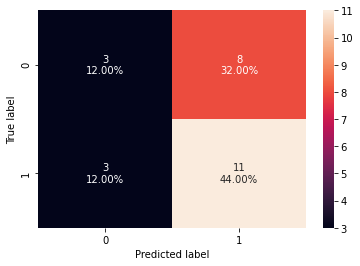

In [88]:
confusion_matrix_sklearn(gbc_over, X_val, y_val)

In [89]:
gbc_over_train_score = model_performance_classification_sklearn(gbc_over, X_train_over, y_train_over)
print("Training performance \n",gbc_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.878049  0.878049   0.878049  0.878049


In [90]:
gbc_over_val_score = model_performance_classification_sklearn(gbc_over, X_val, y_val)
print("Validation performance \n",gbc_over_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.56  0.785714   0.578947  0.666667


### XGB Oversampling

In [91]:
xgb_over = XGBClassifier(eval_metric='logloss')
xgb_over.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

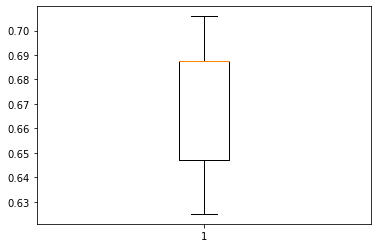

In [92]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True,
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=xgb_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

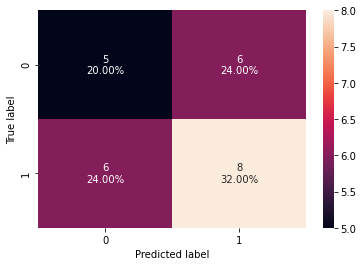

In [93]:
confusion_matrix_sklearn(xgb_over, X_val, y_val)

In [94]:
xgb_over_train_score = model_performance_classification_sklearn(xgb_over, X_train_over, y_train_over)
print("Training performance \n",xgb_over_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.865854  0.853659      0.875  0.864198


In [95]:
xgb_over_val_score = model_performance_classification_sklearn(xgb_over, X_val, y_val)
print("Validation performance \n",xgb_over_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.52  0.571429   0.571429  0.571429


### Undersampling using Random Undersampler

In [96]:
rus = RandomUnderSampler()
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [97]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes' {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 41
Before Under Sampling, counts of label 'No': 34 

After Under Sampling, counts of label 'Yes' 34
After Under Sampling, counts of label 'No': 34 

After Under Sampling, the shape of train_X: (68, 19)
After Under Sampling, the shape of train_y: (68,) 



### Logistic Regression Under Sampling

In [98]:
lr_un = LogisticRegression()
lr_un.fit(X_train_un,y_train_un)

LogisticRegression()

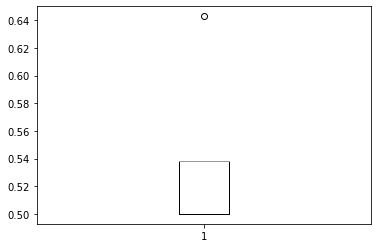

In [99]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True,
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=lr_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [100]:
lr_un_train_score = model_performance_classification_sklearn(lr_un, X_train_un, y_train_un)
print("Training performance \n",lr_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.661765  0.823529   0.622222  0.708861


In [101]:
lr_un_val_score = model_performance_classification_sklearn(lr_un, X_val, y_val)
print("Validation performance \n",lr_un_val_score)

Validation performance 
    Accuracy    Recall  Precision   F1
0      0.52  0.428571        0.6  0.5


### Decision Tree under sampling

In [102]:
dtree_un = DecisionTreeClassifier(criterion = "gini")
dtree_un.fit(X_train_un,y_train_un)

DecisionTreeClassifier()

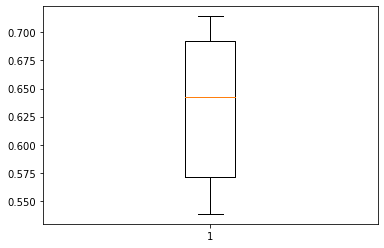

In [103]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=dtree_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [104]:
dtree_un_train_score = model_performance_classification_sklearn(dtree_un, X_train_un, y_train_un)
print("Training performance \n",dtree_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.852941  0.823529      0.875  0.848485


In [105]:
dtree_un_val_score = model_performance_classification_sklearn(dtree_un, X_val, y_val)
print("Validation performance \n",dtree_un_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0       0.4  0.428571   0.461538  0.444444


### Bagging under sampling


In [106]:
bagging_un = BaggingClassifier()
bagging_un.fit(X_train_un,y_train_un)

BaggingClassifier()

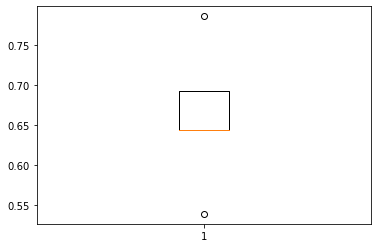

In [107]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=bagging_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [108]:
bagging_un_train_score = model_performance_classification_sklearn(bagging_un, X_train_un, y_train_un)
print("Training performance \n",bagging_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.852941  0.941176        0.8  0.864865


In [109]:
bagging_un_val_score = model_performance_classification_sklearn(bagging_un, X_val, y_val)
print("Validation performance \n",bagging_un_val_score)

Validation performance 
    Accuracy  Recall  Precision        F1
0      0.48     0.5   0.538462  0.518519


### ADABoost under sampling

In [110]:
abc_un = AdaBoostClassifier()
abc_un.fit(X_train_un,y_train_un)

AdaBoostClassifier()

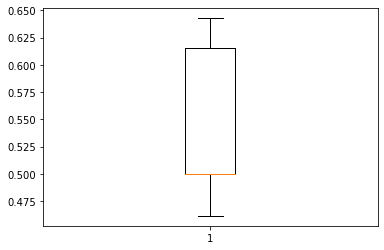

In [111]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=abc_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [112]:
abc_un_train_score = model_performance_classification_sklearn(abc_un, X_train_un, y_train_un)
print("Training performance \n",abc_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.661765  0.735294   0.641026  0.684932


In [113]:
abc_un_val_score = model_performance_classification_sklearn(abc_un, X_val, y_val)
print("Validation performance \n",abc_un_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.48  0.357143   0.555556  0.434783


### GradientBoost under sampling

In [114]:
gbc_un = GradientBoostingClassifier()
gbc_un.fit(X_train_un,y_train_un)

GradientBoostingClassifier()

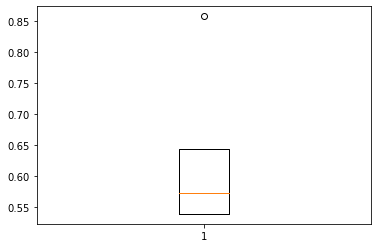

In [115]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=gbc_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [116]:
gbc_un_train_score = model_performance_classification_sklearn(gbc_un, X_train_un, y_train_un)
print("Training performance \n",gbc_un_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.852941  0.941176        0.8  0.864865


In [117]:
gbc_un_val_score = model_performance_classification_sklearn(gbc_un, X_val, y_val)
print("Validation performance \n",gbc_un_val_score)

Validation performance 
    Accuracy    Recall  Precision   F1
0      0.52  0.642857     0.5625  0.6


### XGB under sampling

In [118]:
xgb_un = XGBClassifier(eval_metric='logloss')
xgb_un.fit(X_train_un,y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

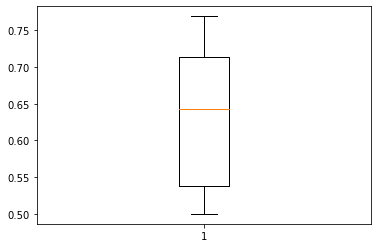

In [119]:
scoring = "accuracy"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=xgb_un, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [120]:
xgb_un_train_score = model_performance_classification_sklearn(xgb_un, X_train_un, y_train_un)
print("Training performance \n",xgb_un_train_score)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.838235  0.852941   0.828571  0.84058


In [121]:
xgb_un_val_score = model_performance_classification_sklearn(xgb_un, X_val, y_val)
print("Validation performance \n",xgb_un_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.52  0.571429   0.571429  0.571429


## Model Comparison

In [122]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lr_train_score.T,lr_over_train_score.T,lr_un_train_score.T,dtree_train_score.T,dtree_over_train_score.T,dtree_un_train_score.T,
     bagging_train_score.T,bagging_over_train_score.T,bagging_un_train_score.T,abc_train_score.T,abc_over_train_score.T,abc_un_train_score.T,
     gbc_train_score.T,gbc_over_train_score.T,gbc_un_train_score.T,xgb_train_score.T,xgb_over_train_score.T,xgb_un_train_score.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Oversample",
    "Logistic Regression Undersample",
    "Decision Tree Classifier",
    "Decision Tree Oversample",
    "Decision Tree Undersample",
    "Bagging Classifier",
    "Bagging Oversample",
    "Bagging Undersample",
    "AdaBoost Classifier",
    "AdaBoost Oversample",
    "AdaBoost Undersample",
    "Gradient Boost Classifier",
    "Gradient Boost Oversample",
    "Gradient Boost Undersample",
    "XGB Classifier",
    "XGB Oversample",
    "XGB Undersample"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression Oversample,Logistic Regression Undersample,Decision Tree Classifier,Decision Tree Oversample,Decision Tree Undersample,Bagging Classifier,Bagging Oversample,Bagging Undersample,AdaBoost Classifier,AdaBoost Oversample,AdaBoost Undersample,Gradient Boost Classifier,Gradient Boost Oversample,Gradient Boost Undersample,XGB Classifier,XGB Oversample,XGB Undersample
Accuracy,0.666667,0.670732,0.661765,0.866667,0.878049,0.852941,0.840000,0.878049,0.852941,0.706667,0.768293,0.661765,0.866667,0.878049,0.852941,0.866667,0.865854,0.838235
Recall,0.853659,0.829268,0.823529,0.853659,0.853659,0.823529,0.853659,0.853659,0.941176,0.829268,0.853659,0.735294,0.902439,0.878049,0.941176,0.902439,0.853659,0.852941
Precision,0.648148,0.629630,0.622222,0.897436,0.897436,0.875000,0.853659,0.897436,0.800000,0.693878,0.729167,0.641026,0.860465,0.878049,0.800000,0.860465,0.875000,0.828571
F1,0.736842,0.715789,0.708861,0.875000,0.875000,0.848485,0.853659,0.875000,0.864865,0.755556,0.786517,0.684932,0.880952,0.878049,0.864865,0.880952,0.864198,0.840580


In [123]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [lr_val_score.T,lr_over_val_score.T,lr_un_val_score.T,dtree_val_score.T,dtree_over_val_score.T,dtree_un_val_score.T,
     bagging_val_score.T,bagging_over_val_score.T,bagging_un_val_score.T,abc_val_score.T,abc_over_val_score.T,abc_un_val_score.T,
     gbc_val_score.T,gbc_over_val_score.T,gbc_un_val_score.T,xgb_val_score.T,xgb_over_val_score.T,xgb_un_val_score.T],
    axis=1,
)
models_val_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Oversample",
    "Logistic Regression Undersample",
    "Decision Tree Classifier",
    "Decision Tree Oversample",
    "Decision Tree Undersample",
    "Bagging Classifier",
    "Bagging Oversample",
    "Bagging Undersample",
    "AdaBoost Classifier",
    "AdaBoost Oversample",
    "AdaBoost Undersample",
    "Gradient Boost Classifier",
    "Gradient Boost Oversample",
    "Gradient Boost Undersample",
    "XGB Classifier",
    "XGB Oversample",
    "XGB Undersample"]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Logistic Regression,Logistic Regression Oversample,Logistic Regression Undersample,Decision Tree Classifier,Decision Tree Oversample,Decision Tree Undersample,Bagging Classifier,Bagging Oversample,Bagging Undersample,AdaBoost Classifier,AdaBoost Oversample,AdaBoost Undersample,Gradient Boost Classifier,Gradient Boost Oversample,Gradient Boost Undersample,XGB Classifier,XGB Oversample,XGB Undersample
Accuracy,0.520000,0.560000,0.520000,0.480000,0.560000,0.400000,0.600000,0.560000,0.480000,0.560000,0.480000,0.480000,0.520000,0.560000,0.520000,0.560000,0.520000,0.520000
Recall,0.571429,0.642857,0.428571,0.500000,0.642857,0.428571,0.571429,0.571429,0.500000,0.500000,0.428571,0.357143,0.714286,0.785714,0.642857,0.714286,0.571429,0.571429
Precision,0.571429,0.600000,0.600000,0.538462,0.600000,0.461538,0.666667,0.615385,0.538462,0.636364,0.545455,0.555556,0.555556,0.578947,0.562500,0.588235,0.571429,0.571429
F1,0.571429,0.620690,0.500000,0.518519,0.620690,0.444444,0.615385,0.592593,0.518519,0.560000,0.480000,0.434783,0.625000,0.666667,0.600000,0.645161,0.571429,0.571429


Decision tree, Bagging XGB

## Model Tuning

### Decision Tree  Classifier

#### GridSearchCV

In [124]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight="balanced")

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned1 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=2)

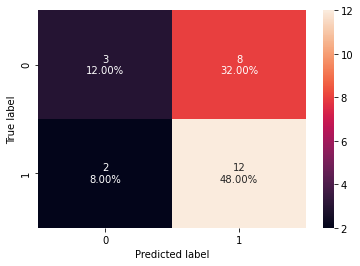

In [125]:
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

In [126]:
dtree_tuned1_train_score = model_performance_classification_sklearn(dtree_tuned1, X_train, y_train)
print("Training performance \n",dtree_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.826667  0.926829   0.791667  0.853933


In [127]:
dtree_tuned1_val_score = model_performance_classification_sklearn(dtree_tuned1, X_val, y_val)
print("Validation performance \n",dtree_tuned1_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0       0.6  0.857143        0.6  0.705882


#### RandomizedsearchCV

In [128]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight="balanced")

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = RandomizedSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [129]:
dtree_tuned2_train_score = model_performance_classification_sklearn(dtree_tuned2, X_train, y_train)
print("Training performance \n",dtree_tuned2_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.693333  0.536585   0.846154  0.656716


In [130]:
dtree_tuned2_val_score = model_performance_classification_sklearn(dtree_tuned2, X_val, y_val)
print("Validation performance \n",dtree_tuned2_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.48  0.285714   0.571429  0.380952


### Bagging  Classifier

#### GridSearchCV

In [131]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight="balanced")
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }
scorer = metrics.make_scorer(metrics.accuracy_score)

grid = GridSearchCV(BaggingClassifier(bootstrap=True), param_grid=param_grid, scoring = scorer, cv = 5)
grid.fit(X_train, y_train)

bagging_tuned1  = grid.best_estimator_
bagging_tuned1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.8, n_estimators=5)

In [132]:
bagging_tuned1_train_score = model_performance_classification_sklearn(bagging_tuned1, X_train, y_train)
print("Training performance \n",bagging_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.826667  0.902439   0.804348  0.850575


In [133]:
bagging_tuned1_val_score = model_performance_classification_sklearn(bagging_tuned1, X_val, y_val)
print("Validation performance \n",bagging_tuned1_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.56  0.714286   0.588235  0.645161


#### RandomizedsearchCV

In [134]:
cl1 = DecisionTreeClassifier(class_weight="balanced")
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }
scorer = metrics.make_scorer(metrics.accuracy_score)

grid = RandomizedSearchCV(BaggingClassifier(bootstrap=True), param_distributions=param_grid, scoring = scorer, cv = 5)
grid.fit(X_train, y_train)

bagging_tuned2  = grid.best_estimator_
bagging_tuned2.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.7, n_estimators=51)

In [135]:
bagging_tuned2_train_score = model_performance_classification_sklearn(bagging_tuned2, X_train, y_train)
print("Training performance \n",bagging_tuned2_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.866667  0.926829   0.844444  0.883721


In [136]:
bagging_tuned2_val_score = model_performance_classification_sklearn(bagging_tuned2, X_val, y_val)
print("Validation performance \n",bagging_tuned2_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.56  0.785714   0.578947  0.666667


### GradientBoost Classifier

#### GridSearchCV

In [184]:
%%time 

# defining model
model = GradientBoostingClassifier()

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(50,250,50),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

gbc_tuned1  = grid_cv.best_estimator_
gbc_tuned1.fit(X_train,y_train)

Wall time: 2.12 s


GradientBoostingClassifier(max_features=0.7, n_estimators=50, subsample=0.9)

In [185]:
gbc_tuned1_train_score = model_performance_classification_sklearn(gbc_tuned1, X_train, y_train)
print("Training performance \n",gbc_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.866667  0.878049   0.878049  0.878049


In [186]:
gbc_tuned1_val_score = model_performance_classification_sklearn(gbc_tuned1, X_val, y_val)
print("Validation performance \n",gbc_tuned1_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.48  0.642857   0.529412  0.580645


#### RandomizedsearchCV

In [181]:
%%time 

# defining model
model = GradientBoostingClassifier()

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(50,250,50),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

gbc_tuned2  = grid_cv.best_estimator_
gbc_tuned2.fit(X_train,y_train)

Wall time: 642 ms


GradientBoostingClassifier(max_features=1, n_estimators=50, subsample=0.8)

In [187]:
gbc_tuned2_train_score = model_performance_classification_sklearn(gbc_tuned2, X_train, y_train)
print("Training performance \n",gbc_tuned2_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.853333  0.902439   0.840909  0.870588


In [188]:
gbc_tuned2_val_score = model_performance_classification_sklearn(gbc_tuned2, X_val, y_val)
print("Validation performance \n",gbc_tuned2_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0      0.52  0.571429   0.571429  0.571429


### XGBoost Classifier

#### GridSearchCV

In [137]:
%%time 

#defining model
model = XGBClassifier(eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)

xgb_tuned1  = grid_cv.best_estimator_
xgb_tuned1.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 1} with CV score=0.6933333333333334:
Wall time: 3min 35s


In [138]:
xgb_tuned1_train_score = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance \n",xgb_tuned1_train_score)

Training performance 
    Accuracy   Recall  Precision       F1
0       0.8  0.95122       0.75  0.83871


In [139]:
# Calculating different metrics on validation set
xgb_tuned1_val_score = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance \n",xgb_tuned1_val_score)

Validation performance 
    Accuracy    Recall  Precision        F1
0       0.6  0.857143        0.6  0.705882


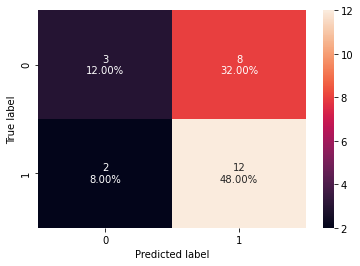

In [140]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

#### RandomizedsearchCV

In [141]:
%%time

# defining model
model = XGBClassifier(eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 2, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.6399999999999999:
Wall time: 4.08 s


In [142]:
xgb_tuned2_train_score = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance \n",xgb_tuned2_train_score)

Training performance 
    Accuracy   Recall  Precision        F1
0      0.68  0.97561   0.634921  0.769231


In [143]:
# Calculating different metrics on validation set
xgb_tuned2_val_score = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance \n",xgb_tuned2_val_score)

Validation performance 
    Accuracy  Recall  Precision        F1
0      0.56     1.0       0.56  0.717949


### Comparing Tuned Models

In [189]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_tuned1_train_score.T,
        dtree_tuned2_train_score.T,
        bagging_tuned1_train_score.T,
        bagging_tuned2_train_score.T,
        gbc_tuned1_train_score.T,
        gbc_tuned2_train_score.T,
        xgb_tuned1_train_score.T,
        xgb_tuned2_train_score.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
    "Bagging Classifier Tuned with Grid search",
    "Bagging Classifier Tuned with Random Search",
    "GradientBoost Classifier Tuned with Grid search",
    "GradientBoost Classifier Tuned with Random Search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Tuned with Grid search,Decision Tree Tuned with Random search,Bagging Classifier Tuned with Grid search,Bagging Classifier Tuned with Random Search,GradientBoost Classifier Tuned with Grid search,GradientBoost Classifier Tuned with Random Search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.826667,0.693333,0.826667,0.866667,0.866667,0.853333,0.80000,0.680000
Recall,0.926829,0.536585,0.902439,0.926829,0.878049,0.902439,0.95122,0.975610
Precision,0.791667,0.846154,0.804348,0.844444,0.878049,0.840909,0.75000,0.634921
F1,0.853933,0.656716,0.850575,0.883721,0.878049,0.870588,0.83871,0.769231


In [191]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        dtree_tuned1_val_score.T,
        dtree_tuned2_val_score.T,
        bagging_tuned1_val_score.T,
        bagging_tuned2_val_score.T,
        gbc_tuned1_val_score.T,
        gbc_tuned2_val_score.T,
        xgb_tuned1_val_score.T,
        xgb_tuned2_val_score.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
    "Bagging Classifier Tuned with Grid search",
    "Bagging Classifier Tuned with Random search",
    "GradientBoost Classifier Tuned with Grid search",
    "GradientBoost Classifier Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree Tuned with Grid search,Decision Tree Tuned with Random search,Bagging Classifier Tuned with Grid search,Bagging Classifier Tuned with Random search,GradientBoost Classifier Tuned with Grid search,GradientBoost Classifier Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.600000,0.480000,0.560000,0.560000,0.480000,0.520000,0.600000,0.560000
Recall,0.857143,0.285714,0.714286,0.785714,0.642857,0.571429,0.857143,1.000000
Precision,0.600000,0.571429,0.588235,0.578947,0.529412,0.571429,0.600000,0.560000
F1,0.705882,0.380952,0.645161,0.666667,0.580645,0.571429,0.705882,0.717949


## Performance on test set

In [192]:
dtree_tuned1_test_score = model_performance_classification_sklearn(dtree_tuned1, X_test, y_test)
print("Testing performance:")
dtree_tuned1_test_score

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.884615,0.785714,1.0,0.88


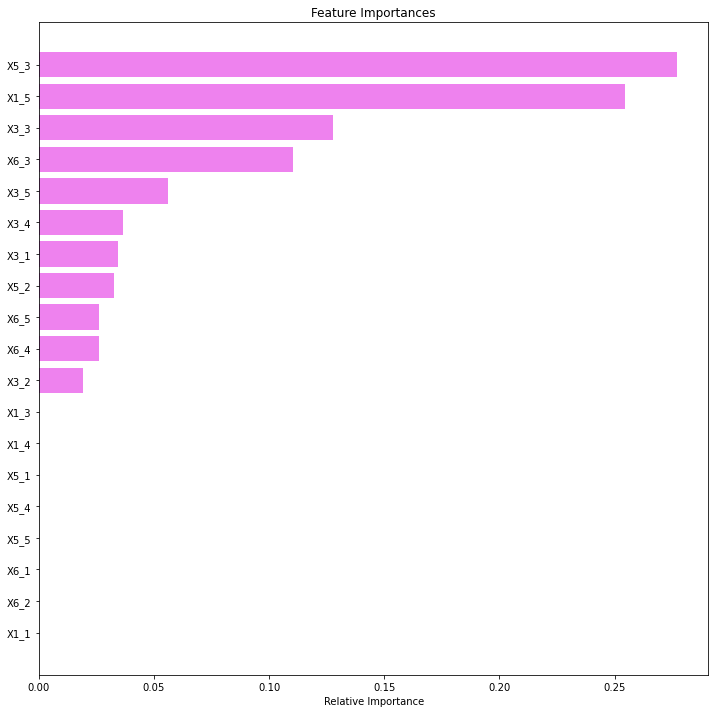

In [193]:
feature_names = X.columns
importances = dtree_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [194]:
xgb_tuned1_test_score = model_performance_classification_sklearn(xgb_tuned1, X_test, y_test)
print("Testing performance:")
xgb_tuned1_test_score

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.846154,0.928571,0.8125,0.866667


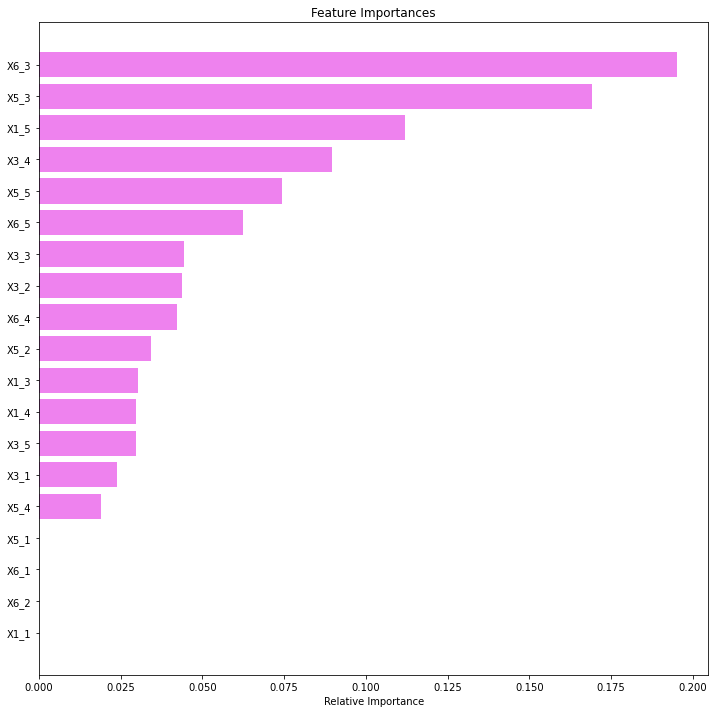

In [195]:
feature_names = X.columns
importances = xgb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### For next week
- use SHAP (https://svitla.com/blog/interpreting-machine-learning-models-lime-and-shap)
- implement k-fold validationa nd compare train test split with kfold results
- feature selection (https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
        https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook

In [214]:
explainer = shap.Explainer(gbc)
shap_values = explainer(X)

In [216]:
shap.plots.force(shap_values[0])

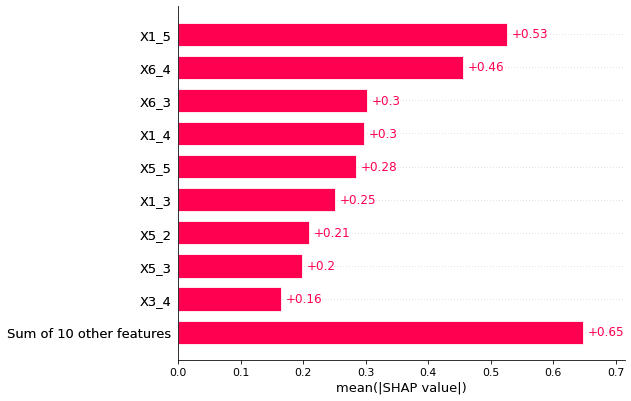

In [217]:
shap.plots.bar(shap_values)

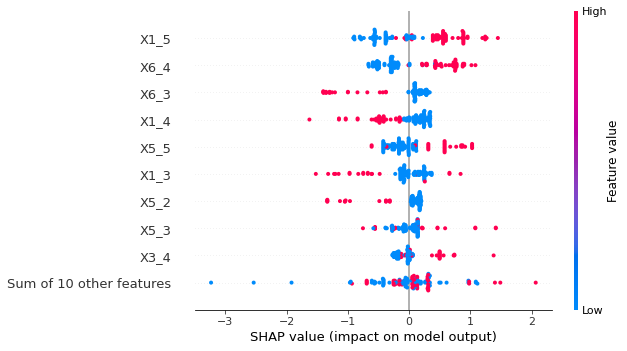

In [218]:
shap.plots.beeswarm(shap_values)

In [196]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X)

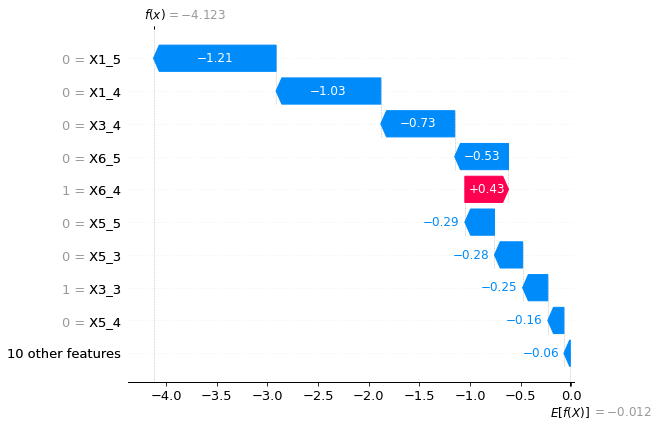

In [197]:
shap.plots.waterfall(shap_values[0])

In [198]:
shap.plots.force(shap_values[0])

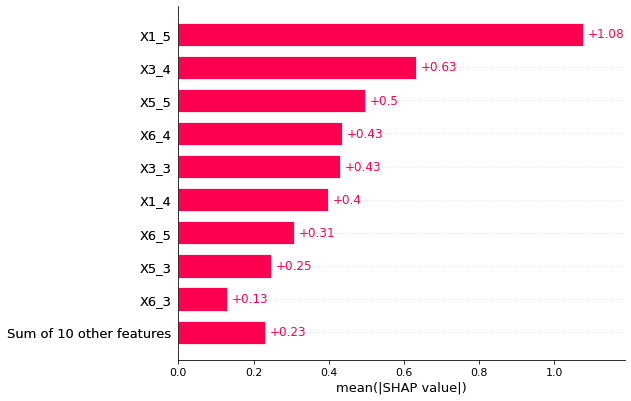

In [199]:
shap.plots.bar(shap_values)

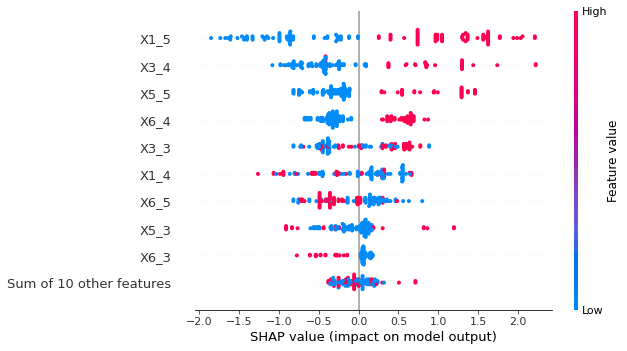

In [200]:
shap.plots.beeswarm(shap_values)

In [201]:
def kfold_full_acc_score(model_base,X,y,model_random="check",model_grid="check",model_name = "model"):
    acc_score = []
    k=10
    kf = KFold(n_splits=k)
    
    for train_index , test_index in kf.split(X):
        Xk_train , Xk_test = X.iloc[train_index,:],X.iloc[test_index,:]
        yk_train , yk_test = y.iloc[train_index] , y.iloc[test_index]
        
        model_base.fit(Xk_train, yk_train)
        pred_values = model_base.predict(Xk_test)
        acc = accuracy_score(pred_values , yk_test)
        acc_score.append(acc)
    avg_acc_score = sum(acc_score)/k
    print(model_name + " score")
    print("-" * 40)
    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print("-" * 120)
    
    sm = SMOTE(
    sampling_strategy=1, k_neighbors=5)  # Synthetic Minority Over Sampling Technique
    Xk_train_over, yk_train_over = sm.fit_resample(Xk_train, yk_train)
    acc_score = []
    
    for train_index , test_index in kf.split(X):
        model_base.fit(Xk_train_over, yk_train_over)
        pred_values = model_base.predict(Xk_test)
        acc = accuracy_score(pred_values , yk_test)
        acc_score.append(acc)
    avg_acc_score = sum(acc_score)/k
    print(model_name + " oversampled score")
    print("-" * 40)
    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print("-" * 120)
    
    rus = RandomUnderSampler()
    Xk_train_un, yk_train_un = rus.fit_resample(Xk_train, yk_train)
    acc_score = []
    
    for train_index , test_index in kf.split(X):
        model_base.fit(Xk_train_un, yk_train_un)
        pred_values = model_base.predict(Xk_test)
        acc = accuracy_score(pred_values , yk_test)
        acc_score.append(acc)
    avg_acc_score = sum(acc_score)/k
    print(model_name + " undersampled score")
    print("-" * 40)
    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print("-" * 120)
    
    if model_grid =="check":
        
        if model_random =="check":
        
            pass
    
        else:
            acc_score = []
            for train_index , test_index in kf.split(X):
                Xk_train , Xk_test = X.iloc[train_index,:],X.iloc[test_index,:]
                yk_train , yk_test = y.iloc[train_index] , y.iloc[test_index]
        
                model_random.fit(Xk_train, yk_train)
                pred_values = model_random.predict(Xk_test)
                acc = accuracy_score(pred_values , yk_test)
                acc_score.append(acc)
            avg_acc_score = sum(acc_score)/k
            print(model_name + " Randomsearch score")
            print("-" * 40)
            print('accuracy of each fold - {}'.format(acc_score))
            print('Avg accuracy : {}'.format(avg_acc_score))
            print("-" * 120)
        
        
        pass
    
    else:
        acc_score = []
        for train_index , test_index in kf.split(X):
            Xk_train , Xk_test = X.iloc[train_index,:],X.iloc[test_index,:]
            yk_train , yk_test = y.iloc[train_index] , y.iloc[test_index]
        
            model_grid.fit(Xk_train, yk_train)
            pred_values = model_grid.predict(Xk_test)
            acc = accuracy_score(pred_values , yk_test)
            acc_score.append(acc)
        avg_acc_score = sum(acc_score)/k
        print(model_name + " Gridsearch score")
        print("-" * 40)
        print('accuracy of each fold - {}'.format(acc_score))
        print('Avg accuracy : {}'.format(avg_acc_score))
        print("-" * 120)
        
        if model_random =="check":
        
            pass
    
        else:
            acc_score = []
            for train_index , test_index in kf.split(X):
                Xk_train , Xk_test = X.iloc[train_index,:],X.iloc[test_index,:]
                yk_train , yk_test = y.iloc[train_index] , y.iloc[test_index]
        
                model_random.fit(Xk_train, yk_train)
                pred_values = model_random.predict(Xk_test)
                acc = accuracy_score(pred_values , yk_test)
                acc_score.append(acc)
            avg_acc_score = sum(acc_score)/k
            print(model_name + " Randomsearch score")
            print("-" * 40)
            print('accuracy of each fold - {}'.format(acc_score))
            print('Avg accuracy : {}'.format(avg_acc_score))
            print("-" * 120)

In [202]:
kfold_full_acc_score(dtree,X,y,model_grid=dtree_tuned1,model_random = dtree_tuned2,model_name="Decision Tree")

Decision Tree score
----------------------------------------
accuracy of each fold - [0.7692307692307693, 0.8461538461538461, 0.5384615384615384, 0.5384615384615384, 0.7692307692307693, 0.6923076923076923, 0.4166666666666667, 0.6666666666666666, 0.5, 0.5833333333333334]
Avg accuracy : 0.632051282051282
------------------------------------------------------------------------------------------------------------------------
Decision Tree oversampled score
----------------------------------------
accuracy of each fold - [0.5, 0.5833333333333334, 0.5, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5, 0.5, 0.5833333333333334, 0.5833333333333334]
Avg accuracy : 0.55
------------------------------------------------------------------------------------------------------------------------
Decision Tree undersampled score
----------------------------------------
accuracy of each fold - [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Avg accuracy : 0.5
----------------------------

In [203]:
kfold_full_acc_score(lr,X,y,model_name="Logistic Regression")

Logistic Regression score
----------------------------------------
accuracy of each fold - [0.6153846153846154, 0.46153846153846156, 0.38461538461538464, 0.5384615384615384, 0.5384615384615384, 0.6153846153846154, 0.5833333333333334, 0.75, 0.4166666666666667, 0.4166666666666667]
Avg accuracy : 0.5320512820512822
------------------------------------------------------------------------------------------------------------------------
Logistic Regression oversampled score
----------------------------------------
accuracy of each fold - [0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667]
Avg accuracy : 0.41666666666666663
------------------------------------------------------------------------------------------------------------------------
Logistic Regression undersampled score
----------------------------------------
accuracy of each fold - [

In [204]:
kfold_full_acc_score(bagging,X,y,model_grid=bagging_tuned1,model_random = bagging_tuned2,model_name="Bagging")

Bagging score
----------------------------------------
accuracy of each fold - [0.8461538461538461, 0.8461538461538461, 0.46153846153846156, 0.38461538461538464, 0.8461538461538461, 0.7692307692307693, 0.5, 0.75, 0.5, 0.5833333333333334]
Avg accuracy : 0.6487179487179487
------------------------------------------------------------------------------------------------------------------------
Bagging oversampled score
----------------------------------------
accuracy of each fold - [0.5, 0.6666666666666666, 0.5, 0.5833333333333334, 0.6666666666666666, 0.5, 0.4166666666666667, 0.5833333333333334, 0.75, 0.5]
Avg accuracy : 0.5666666666666667
------------------------------------------------------------------------------------------------------------------------
Bagging undersampled score
----------------------------------------
accuracy of each fold - [0.5833333333333334, 0.5, 0.5, 0.5833333333333334, 0.5, 0.5833333333333334, 0.5, 0.4166666666666667, 0.5, 0.5]
Avg accuracy : 0.51666666666666

In [205]:
kfold_full_acc_score(abc,X,y,model_name="ADA Boost")

ADA Boost score
----------------------------------------
accuracy of each fold - [0.6923076923076923, 0.46153846153846156, 0.46153846153846156, 0.5384615384615384, 0.5384615384615384, 0.6923076923076923, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.4166666666666667]
Avg accuracy : 0.5384615384615385
------------------------------------------------------------------------------------------------------------------------
ADA Boost oversampled score
----------------------------------------
accuracy of each fold - [0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667]
Avg accuracy : 0.41666666666666663
------------------------------------------------------------------------------------------------------------------------
ADA Boost undersampled score
----------------------------------------
accuracy of each fold - [0.33333333333333

In [208]:
kfold_full_acc_score(gbc,X,y,model_grid=gbc_tuned1,model_random = gbc_tuned2,model_name="Gradient Boost")

Gradient Boost score
----------------------------------------
accuracy of each fold - [0.8461538461538461, 0.8461538461538461, 0.5384615384615384, 0.5384615384615384, 0.8461538461538461, 0.7692307692307693, 0.5, 0.5833333333333334, 0.5, 0.5]
Avg accuracy : 0.6467948717948718
------------------------------------------------------------------------------------------------------------------------
Gradient Boost oversampled score
----------------------------------------
accuracy of each fold - [0.5, 0.5, 0.5, 0.4166666666666667, 0.5, 0.5, 0.5, 0.4166666666666667, 0.5, 0.5]
Avg accuracy : 0.4833333333333334
------------------------------------------------------------------------------------------------------------------------
Gradient Boost undersampled score
----------------------------------------
accuracy of each fold - [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Avg accuracy : 0.5
----------------------------------------------------------------------------------------------------

In [207]:
kfold_full_acc_score(xgb,X,y,model_grid=xgb_tuned1,model_random = xgb_tuned2,model_name="XGBoost")

XGBoost score
----------------------------------------
accuracy of each fold - [0.8461538461538461, 0.9230769230769231, 0.3076923076923077, 0.46153846153846156, 0.7692307692307693, 0.8461538461538461, 0.6666666666666666, 0.5833333333333334, 0.5, 0.5833333333333334]
Avg accuracy : 0.6487179487179486
------------------------------------------------------------------------------------------------------------------------
XGBoost oversampled score
----------------------------------------
accuracy of each fold - [0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334]
Avg accuracy : 0.5833333333333333
------------------------------------------------------------------------------------------------------------------------
XGBoost undersampled score
----------------------------------------
accuracy of each fold - [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,